# QA4MBES functionality 1: point cloud coverage test


In [1]:
from shapely.geometry import shape
import json

In [2]:
## awkward hack to import local modules in Jupyter
import sys
sys.executable
sys.path.append('/mnt/bigdata/frontierSI/qa4mbes-data-pipeline/qa4mbes')

In [3]:
import testcoverage
import getpointcoverage

## 1. Check XYZ ASCII point cloud coverage of a planned area

Does my XYZ point cloud cover any of the planned survey region? if so how much? if not roughly how far away were we?

### The positive case - we surveyed some of the planned region

In [4]:
%%time

coveragestats = testcoverage.testcoverage('../tests/xyzdata/4819-100000lines.xyz', 
                                          '../tests/pointcoverages/testjson.geojson')

CPU times: user 742 ms, sys: 4.37 ms, total: 746 ms
Wall time: 742 ms


In [5]:
coveragestats

{'teststart': '2019-03-04T20:36:10.104629',
 'teststop': '2019-03-04T20:36:10.846130',
 'plannedcoverage': '../tests/pointcoverages/testjson.geojson',
 'testswath': '../tests/xyzdata/4819-100000lines.xyz',
 'percentcovered': 0.5445980785159709,
 'areacovered': 136304.97323926608,
 'centroiddistance': 235.72116814219288,
 'minimumdistance': 0.0,
 'intersection': '{"type": "MultiPolygon", "coordinates": [[[[148.52895313064167, -41.825216204223096], [148.52934304544397, -41.826379949940716], [148.5223273977558, -41.82779374966494], [148.52160830119598, -41.827314351958414], [148.52161159, -41.82730296], [148.52159818187823, -41.82730760574656], [148.5215426477066, -41.82727058296548], [148.52154104, -41.82726223], [148.52153011825837, -41.82726223], [148.52150244492498, -41.82724378111107], [148.52157632, -41.82720113], [148.52154104, -41.82705857], [148.52158807, -41.82697711], [148.52164687, -41.82699747], [148.52164687, -41.82691601], [148.5216939, -41.82687527], [148.52164687, -41.826

#### Display the intersection of the planned and surveyed coverages

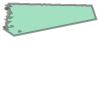

In [6]:
shape(json.loads(coveragestats["intersection"]))

### The null case - we didn't survey any of the planned region

In [7]:
%%time

nullstats = testcoverage.testcoverage('../tests/xyzdata/4819-100000lines.xyz',
                                      '../tests/pointcoverages/nulltest.shp')

CPU times: user 745 ms, sys: 19.4 ms, total: 764 ms
Wall time: 760 ms


In [8]:
nullstats

{'teststart': '2019-03-04T20:36:10.908074',
 'teststop': '2019-03-04T20:36:11.668036',
 'plannedcoverage': '../tests/pointcoverages/nulltest.shp',
 'testswath': '../tests/xyzdata/4819-100000lines.xyz',
 'percentcovered': None,
 'areacovered': None,
 'centroiddistance': 861.5700123271158,
 'minimumdistance': 183.13389388218107,
 'intersection': None}

## 2. Test coverage of LAS/LAZ file

First of all, a LAZ file with a CRS should pass:

In [9]:
%%time

lascoveragestats = testcoverage.testcoverage('../tests/lasdata/4819-100000lines.laz',
                                             '../tests/pointcoverages/testjson.geojson')

CPU times: user 368 ms, sys: 4.91 ms, total: 373 ms
Wall time: 371 ms


In [13]:
lascoveragestats

{'teststart': '2019-03-04T20:36:11.700821',
 'teststop': '2019-03-04T20:36:12.071650',
 'plannedcoverage': '../tests/pointcoverages/testjson.geojson',
 'testswath': '../tests/lasdata/4819-100000lines.laz',
 'percentcovered': 0.533382596577006,
 'areacovered': 133497.90133456554,
 'centroiddistance': 234.8802867726234,
 'minimumdistance': 0.0,
 'intersection': '{"type": "MultiPolygon", "coordinates": [[[[148.5289587992569, -41.825233122859395], [148.52901755931663, -41.82540849903759], [148.52892972231245, -41.82541637661225], [148.52893044736155, -41.82544684471129], [148.52898887994965, -41.82543082788375], [148.52903461503615, -41.825459403800515], [148.52927395346143, -41.826173736946714], [148.52925358698505, -41.82617400815614], [148.52927946077537, -41.82619017416061], [148.52934304544397, -41.826379949940716], [148.5223273977558, -41.82779374966494], [148.52178361357437, -41.82743122687732], [148.52223690676308, -41.827410145472534], [148.52218914717335, -41.82738030077217], [14

#### Show the intersection

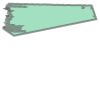

In [14]:
shape(json.loads(lascoveragestats["intersection"]))

...and a specially constructed CRS-free LAS file should fail:

In [11]:
failedlas = testcoverage.testcoverage('../tests/lasdata/4819-100000lines-nocrs.laz',
                                      '../tests/pointcoverages/testjson.geojson')

In [12]:
failedlas

'{"QAfailed": "No CRS present", "filename": "../tests/lasdata/4819-100000lines-nocrs.laz"}'

## Interpreting results

`testcoverage` returns a python dictionary containing:

- time of test start
- time of test stop
- path to the 'planned' coverage
- path to the survey swathe being tested
- % of planned coverage overlapped by the swath
- area (in metres) of the planned coverage overlapped by the swath
- distance (in metres) between the centroids of the planned coverage and the swath coverage
- minimum distance (in metres) between the planned and survey coverages. This is a rough guide mainly used to see how far away the survey was in the case of no overlap with the planned region
- a GeoJSON polygon describing the intersection of planned coverage and survey coverage

Optionally, it could contain GeoJSON polygons describing the actual coverages used in the test.

**question:** should swath density metrics be included here?